# Sieci Neuronowe z Keras
##### Przygotował: Jan Karaś



Wprowadzenie w praktycnzy aspekt korzystania z Sieci Neuronowych. Z tego notatnika dowiesz się jak:
- skonfigurować sobie środowisko pracy, tak aby uniknąć irytujących problemów
- czym jest Keras i jak za jego pomocą tworzyć sieci neuronowe
- udoskonalać i zapysywać wytrenowaną sieć

# Konfiguracja

###  Środowisko wirtualne oraz dodanie go do Notatnika Jupyter
<div class="alert alert-block alert-info">
<b>Wskazówka</b> Najlepiej wszystkie komendy i proces instalacji zrobić w Anaconda Prompt. W notatnikach Jupyter nie widać postępów i dłużące się czekanie może być uciążliwe.
</div>

Aby stworzyć wirtualne środowisko dla swojego projektu a następnie dodać je do notatnika jupyter wykonaj poniższe polecenia w konsoli:
```
conda create --name twojaNazwa
conda activate twojaNazwa
conda install -c anaconda ipykernel
python -m ipykernel install --user --name=twojaNazwa
```
### Klonowanie repozytorium koła naukowego

<b>Opisz jak sklonować repo i je w sumie zrób xD</b>


### Instalacja bibliotek
Będziemy korzystać z różnych bibliotek, ich ilość na początku może być przytłaczająca, ale nie należy się tym przejmować. Z czasem oswoisz się z tym, że instaluje się ich tak wiele. W tym projekcie będziemy korzystać z:
- tensorflow - sieci neuronowe
- keras - api ułatwiające korzystanie z tensorflow
- matplotlib - wykresy
- padnas - zapisywanie, wyświetlanie i obsługa tabelek z danymi
- numpy - operacje numeryczne
- kaggle - obsługiwanie pobierania danych ze strony kaggle

Aby zainstalować wymienione bibioteki wpisz w anaconda propmt następujące komendy (pamiętaj, aby robić to z aktywnyn środowiskiem wirtualnym, które przed chwilą stworzyłeś):
<div class="alert alert-block alert-success">
    <b> Opcja 1 - instalacja poprzez użycie requirements.txt</b> <br>
    pip install -r requirements.txt
</div>

<div class="alert alert-block alert-success">
    <b> Opcja 2 - instalacja poszczególnych bibliotek</b> <br>
    conda install tensorflow <br>
    conda install keras <br>
    conda install matplotlib <br>
    conda install pandas <br>
    conda install numpy <br>
    pip install kaggle <br>
    pip install opendatasets
</div>

In [ ]:
import tensorflow as tf
import keras


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import opendatasets as od

### Nasz cel
Będziemy korzystać ze zbioru CIFAR-10. Jest to zbiór zawierający obrazki o wymiarach 28 na 28, wraz z etykietami. Istnieje 10 różnych etykiet (stąd nazwa zbioru). Jest to jeden z najbardziej znanych zbiorów wykorzysytwanych do celów edukacyjnych. Będziemy przewidywać do której klasy należy dany obrazek.

Dla sprawdzenia samego siebie możesz swoje predykcje przesłać do strony Kaggle i zobaczyć jaką pozycję uzyskasz w rankingu: https://www.kaggle.com/competitions/cifar-10

### Pobranie danych z Kaggle za pomocą API
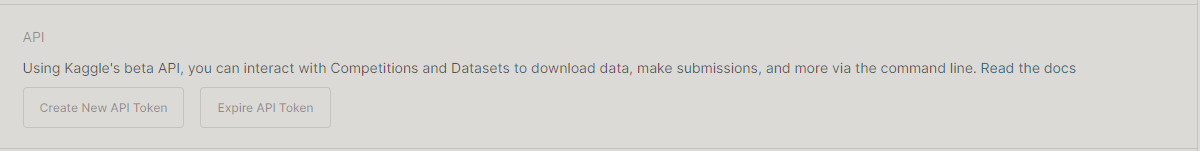
Aby wykorzystać API na swoim profilu Kaggle w zakładce account musimy wygenerować API Token. Zostanie pobrany plik kaggle.json, który kopijemy do stworzonego przez nas folderu kaggle.

In [7]:
# #if not os.path.exists('./kaggle'):
# if not os.path.exists(r'C:\Users\janek\.kaggle'):
#     os.mkdir(r'./kaggle') # Tworzenie folderu na token

# import shutil

# # TODO: tu musi jeszcze polecieć komenda do pobierania tokena

# #if not os.path.exists('./kaggle/kaggle.json'):
# if not os.path.exists(r'C:\Users\janek\.kaggle\kaggle.json'):
#     source = r'C:\Users\janek\Downloads\kaggle.json'
#     #destination = './kaggle/kaggle.json'
#     destination=r'C:\Users\janek\.kaggle'
#     shutil.move(source, destination) # Przenoszenie tokena do stworzonego przez nas folderu w projekcie

<!-- api_command = 'kaggle competitions download -c cifar-10'

if not os.path.exists('./data'):
    os.mkdir('./data')

path = rf'{os.path.dirname(os.getcwd())}'+ r'\data'

os.chdir(parent_dir)

!kaggle competitions download -c cifar-10
# działa w terminalu, czemu nie dizała tutaj???
# Możliwe, że chodzi o proces instalacji i pip nie działa w JN
# conda install -c conda-forge kaggle

import kaggle

# https://www.youtube.com/watch?v=mqG5K9YjjhA
# https://www.youtube.com/watch?v=LRGwvGQaUiQ

from kaggle.api.kaggle_api_extended import KaggleApi

import kaggle.api

kaggle.api.authenticate()

kaggle.api.competition_download_file('https://www.kaggle.com/competitions/cifar-10',
                                     'train.7z')

!kaggle competitions download -c cifar-10

!kaggle competitions list

kaggle competitions download -c cifar-10 -->

In [6]:
dataset = 'https://www.kaggle.com/competitions/cifar-10/data'
od.download(dataset, force=True,)
data_dir = '.\cifar-10'
os.listdir(data_dir)
# e9bc0da0128b38273b7f2aa69690c38e

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rayreddington
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 715M/715M [00:19<00:00, 38.0MB/s]



Extracting archive .\cifar-10/cifar-10.zip to .\cifar-10


['sampleSubmission.csv', 'test.7z', 'train.7z', 'trainLabels.csv']

In [16]:
sampleSubmissions = pd.read_csv(r'cifar-10/sampleSubmission.csv')
# train = pd.read_csv(r'cifar-10/train.7z')
#sampleSubmissions = pd.read_csv(r'cifar-10/sampleSubmission.csv')
# train.head()

In [19]:
df = pd.read_csv('cifar-10/train.7z', storage_options={'compression': 'xz'})
df.head()

ValueError: storage_options passed with file object or non-fsspec file path